In [34]:
import pickle
import argparse
import os
import pandas as pd
import plotting_code
from pathlib import Path

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

REVIEW_TESTING_DIR = "../review_model_review_testing_outputs"





/data/anaconda3/envs/madhu-py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [35]:
%matplotlib notebook

In [54]:
saves_dir = "../review_model_sentence_testing_outputs" 
bargraph_savepath = "../review_model_sentence_testing_outputs/plots/reviews_with_negation"
plot_type = "negation_positive_plot"
label = "negative"
correction_score = False

In [55]:

names_map = {
    "yelp": "Yelp", 
    "imdb": "IMDB", 
    "tripadvisor": "Tripadvisor", 
    "cellphones_and_accessories": "Cellphones", 
    "pet_supplies": "Pet Supplies",
    "automotive": "Automotive", 
    "luxury_beauty": "Luxury Beauty", 
    "sports_and_outdoors": "Sports", 
}
plot_df = pd.DataFrame()
# for subdir in os.listdir(saves_dir):
for d in list(names_map.keys()):
    # print(subdir)
    # if os.path.isdir(os.path.join(saves_dir, subdir)):
    if True:
        pos_file = os.path.join(saves_dir, d, "pos_sents_test")        
        neg_file = os.path.join(saves_dir, d, "neg_sents_test")
        # print(neg_file)
        data_pos = pickle.load(open(pos_file, "rb"))
        data_neg = pickle.load(open(neg_file, "rb"))

        pos_file_review_testing = os.path.join(REVIEW_TESTING_DIR, d, "pos_reviews_test")        
        neg_file_review_testing = os.path.join(REVIEW_TESTING_DIR, d, "neg_reviews_test")
        # print(neg_file)
        data_pos_review_testing = pickle.load(open(pos_file_review_testing, "rb"))
        data_neg_review_testing = pickle.load(open(neg_file_review_testing, "rb"))
        # print(data_neg)
        dataset_name = data_pos["name"].to_list()[0]
        if plot_type == "normal_plot":
            plot_df = plot_df.append({
                "name": names_map[dataset_name],
                "review_category": "positive",
                "accuracy": data_pos["accuracy"].to_list()[0]*100,
            }, ignore_index=True)

            plot_df = plot_df.append({
                "name": names_map[dataset_name],
                "review_category": "negative",
                "accuracy": data_neg["accuracy"].to_list()[0]*100,
            }, ignore_index=True)
        elif plot_type == "negation_positive_plot":
            if label == "positive":
                data_df_plot = data_pos
                data_df_plot_review_testing = data_pos_review_testing
            else:
                data_df_plot = data_neg
                data_df_plot_review_testing = data_neg_review_testing

            if correction_score == True:
                correct_count = data_df_plot_review_testing["correct_count"].to_list()[0]
                total_count = data_df_plot_review_testing["total_count"].to_list()[0]
                accuracy = data_df_plot["accuracy"].to_list()[0]
                true_rate = correct_count/total_count
                false_rate = (total_count-correct_count)/total_count
                acc = true_rate*accuracy + false_rate*(1-accuracy)
            else:                    
                acc = data_df_plot["correct_count"].to_list()[0]/data_df_plot["total_count"].to_list()[0]

            plot_df = plot_df.append({
                "name": names_map[dataset_name],
                "category": "all sentences",
                "accuracy": acc*100,
            }, ignore_index=True)

            acc = data_df_plot["correct_count_with_negation"].to_list()[0]/data_df_plot["total_negation_count"].to_list()[0]
            if correction_score == True:
                # accuracy = data_df_plot["accuracy"].to_list()[0]
                true_rate = data_df_plot_review_testing["correct_count_with_negation"].to_list()[0]/ \
                    data_df_plot_review_testing["total_negation_count"].to_list()[0]
                false_rate = data_df_plot_review_testing["incorrect_count_with_negation"].to_list()[0]/ \
                    data_df_plot_review_testing["total_negation_count"].to_list()[0]
                acc = true_rate*acc + false_rate*(1-acc)


            plot_df = plot_df.append({
                "name": names_map[dataset_name],
                "category": "sentences with negation",
                "accuracy": acc*100,
            }, ignore_index=True)

            acc = data_df_plot["correct_count_with_pos_words"].to_list()[0]/data_df_plot["total_count_with_pos_words"].to_list()[0]
            if correction_score == True:                    
                true_rate = data_df_plot_review_testing["correct_count_with_pos_words"].to_list()[0]/ \
                    data_df_plot_review_testing["total_count_with_pos_words"].to_list()[0]
                false_rate = data_df_plot_review_testing["incorrect_count_with_pos_words"].to_list()[0]/ \
                    data_df_plot_review_testing["total_count_with_pos_words"].to_list()[0]
                acc = true_rate*acc + false_rate*(1-acc)


            plot_df = plot_df.append({
                "name": names_map[dataset_name],
                "category": "sentences with positive lexicons",
                "accuracy": acc*100,
            }, ignore_index=True)


amazon_names = ['Pet Supplies', 'Luxury Beauty', 'Automotive', 'Cellphones', 'Sports']
amazon_names = [val for val in amazon_names]   
if plot_type == "normal_plot":
    colors = [(84/255, 141/255, 255/255),  (84/255, 141/255, 255/255)]*2
elif plot_type == "negation_positive_plot":
    colors = [(183/255, 183/255, 183/255),(67/255, 144/255, 188/255), (2/255, 72/255, 110/255)]*2

# print(plot_df)
Path(os.path.join(saves_dir, "df_outputs")).mkdir(parents=True, exist_ok=True)
plot_df.to_csv(os.path.join(saves_dir, "df_outputs",
    'df_outputs_correction_'+str(correction_score)+'_'+plot_type+'_'+label+'_reviews.csv') )


plot_df_amz = plot_df[plot_df["name"].isin(amazon_names)]
plot_df_non_amz = plot_df[~plot_df["name"].isin(amazon_names)]

if label == 'positive':
    y_axis_name = "\% of pos. sentences"
else:
    y_axis_name = "\% of neg. sentences"

ylim_top = plot_df_amz.max(axis=0)["accuracy"]
ylim_top = 1.7*ylim_top

Path(os.path.dirname(bargraph_savepath)).mkdir(parents=True, exist_ok=True)

if correction_score:
    save_path = bargraph_savepath+"_"+ label+"_reviews_with_correction"
else:
    save_path = bargraph_savepath+"_"+ label+"_reviews"

ylim_top = plot_df_non_amz.max(axis=0)["accuracy"]
ylim_top = 1.7*ylim_top


In [56]:
# plot_df_amz

../review_model_sentence_testing_outputs/plots/reviews_with_negation_negative_reviews_amz


/home/madhu/bert-finetuning/code/plotting_code.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


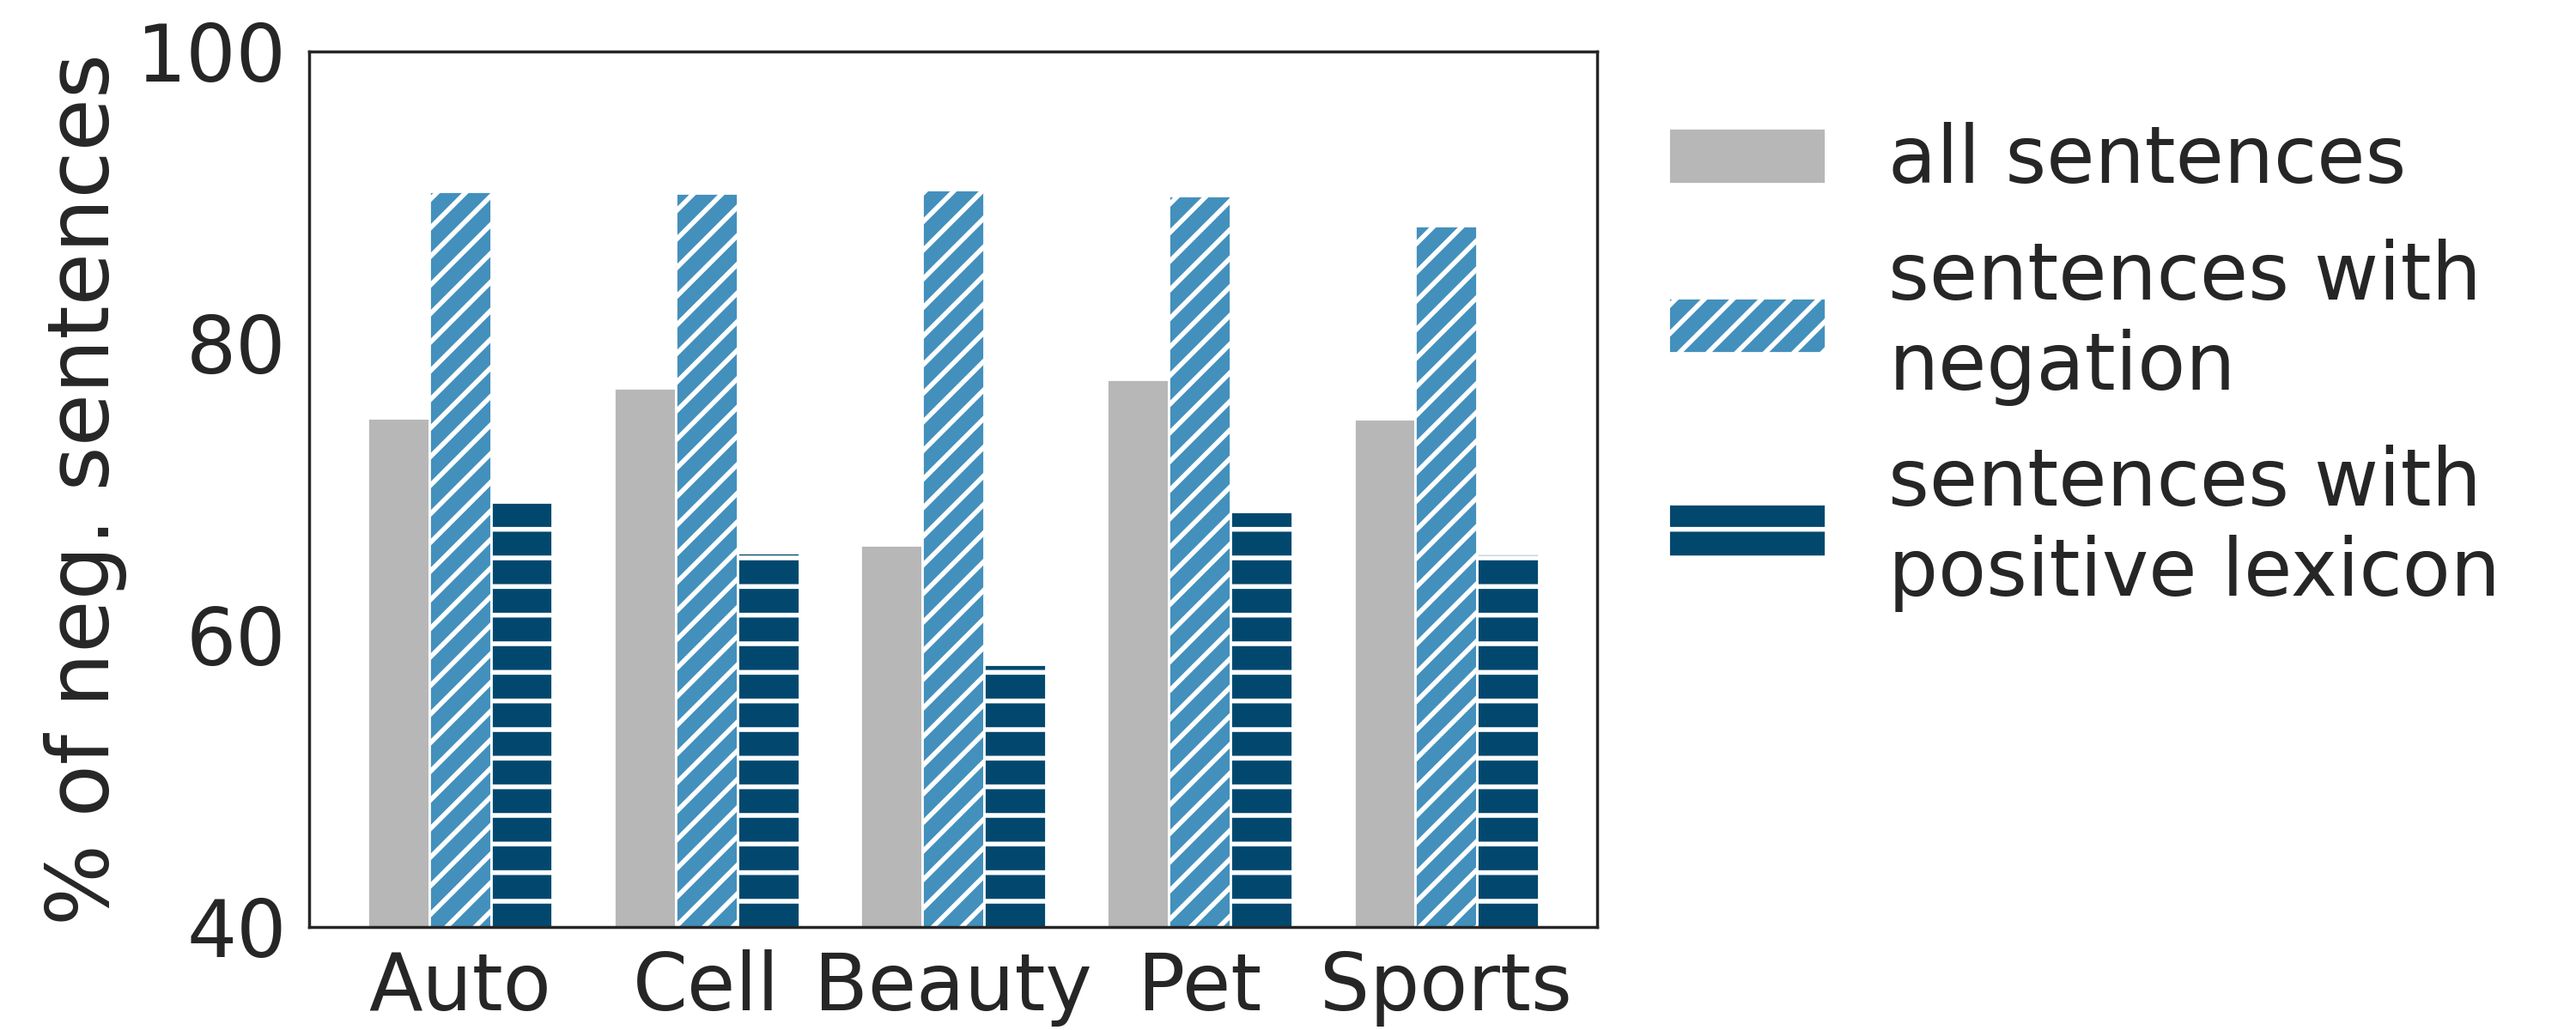

     accuracy                          category    name
15  74.880000  all sentences                     Auto  
16  90.427699  sentences with negation           Auto  
17  69.114991  sentences with positive lexicons  Auto  
9   76.960000  all sentences                     Cell  
10  90.289953  sentences with negation           Cell  
11  65.623221  sentences with positive lexicons  Cell  
18  66.200000  all sentences                     Beauty
19  90.530760  sentences with negation           Beauty
20  58.023050  sentences with positive lexicons  Beauty
12  77.540000  all sentences                     Pet   
13  90.097629  sentences with negation           Pet   
14  68.447694  sentences with positive lexicons  Pet   
21  74.820000  all sentences                     Sports
22  88.031161  sentences with negation           Sports
23  65.579499  sentences with positive lexicons  Sports
../review_model_sentence_testing_outputs/plots/reviews_with_negation_negative_reviews_non_amz


/home/madhu/bert-finetuning/code/plotting_code.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


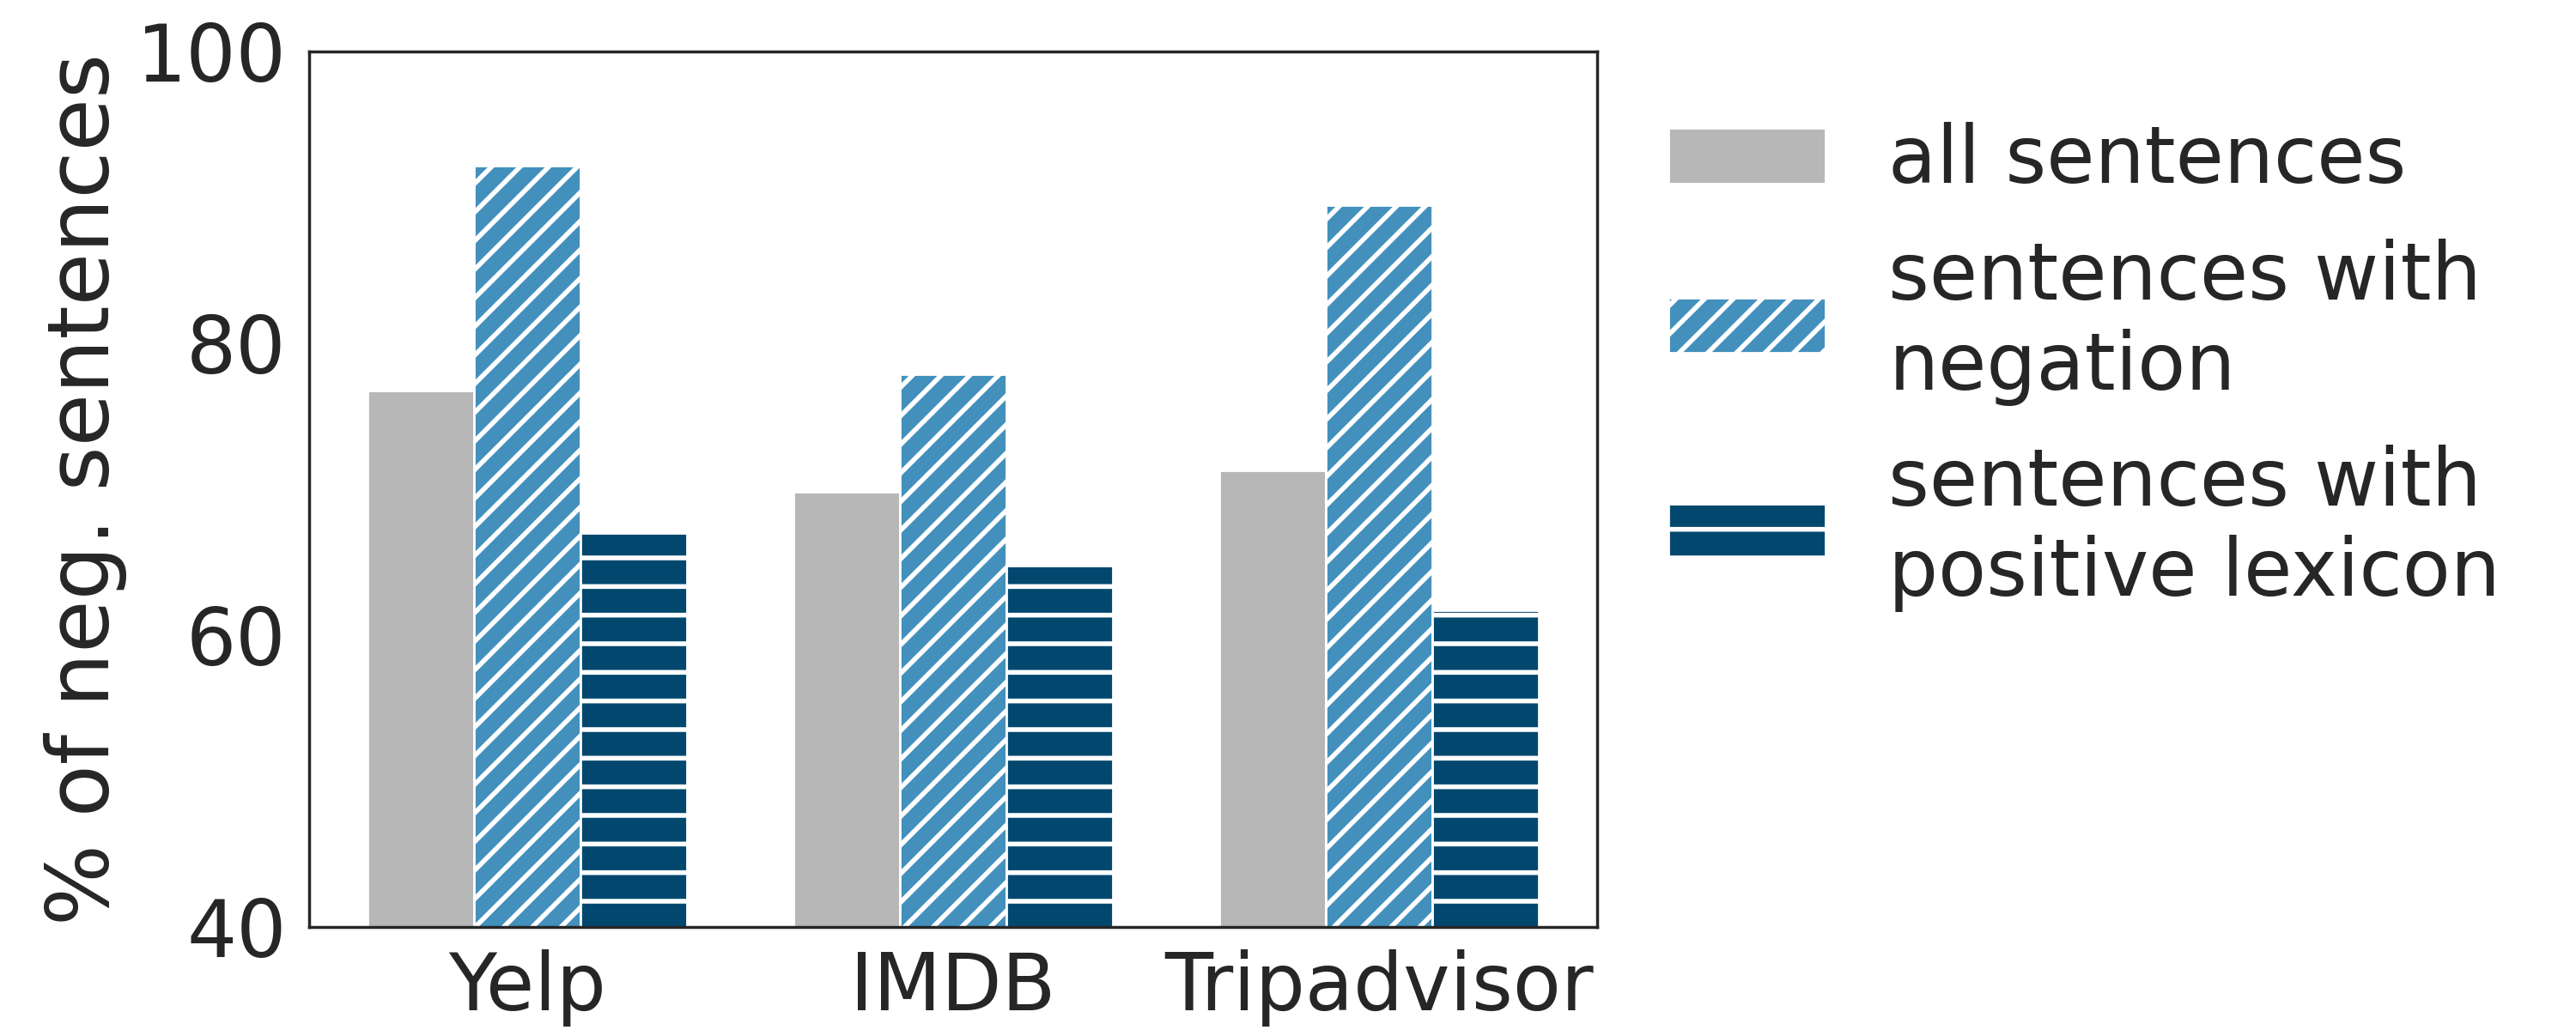

    accuracy                          category         name
0  76.740000  all sentences                     Yelp       
1  92.188919  sentences with negation           Yelp       
2  66.976456  sentences with positive lexicons  Yelp       
3  69.820000  all sentences                     IMDB       
4  77.905945  sentences with negation           IMDB       
5  64.755481  sentences with positive lexicons  IMDB       
6  71.280000  all sentences                     Tripadvisor
7  89.486166  sentences with negation           Tripadvisor
8  61.726292  sentences with positive lexicons  Tripadvisor


In [57]:
reload(plotting_code)
plotting_code.draw_grouped_barplot_three_subbars(plot_df_amz, colors, "name", "accuracy", 
                                                "category", save_path+"_amz", 
#                                                  ylim_top=ylim_top, 
                                                 y_axis_name="% of neg. sentences",
                                                figsize=(15,6), position=(0.12,0.1,0.5,0.85),
                                                bbox_to_anchor=(1, 0.5, 0.2, 0.5),
                                                amazon_data_flag=True)
reload(plotting_code)
plotting_code.draw_grouped_barplot_three_subbars(plot_df_non_amz, colors, "name", "accuracy", 
                                                "category", save_path+"_non_amz", 
#                                                  ylim_top=ylim_top, 
                                                 y_axis_name="% of neg. sentences",
                                                figsize=(15,6), position=(0.12,0.1,0.5,0.85),
                                                bbox_to_anchor=(1, 0.5, 0.2, 0.5),
                                                amazon_data_flag=False)

In [6]:
from importlib import reload